In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Training the model

The train_model function will train the model by using Gradient Descent estimation for the parameters. It starts off by randomly initializing the weights with numbers between 0 to 9. Then, it will start estimating the parameters via gradient descent.

The steps for this part is as follows:
> 1. Randomly initialize the weights
> 2. Calculate the cost for this model
> 3. Improve the weights by estimating via Gradient Descent algorithm
> 4. Return the estimated weights and cost history

#### References used

https://medium.com/geekculture/linear-regression-from-scratch-in-python-without-scikit-learn-a06efe5dedb6

https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/ 

In [46]:
def train_model(X, y, alpha, max_epoch):
    """ Pass four arguments
        Arguments:
            X: input features
            y: responses
            alpha: learning rate
            max_epoch: maximum epochs
        Returns:
            w: estimated weights
            hist_loss: training loss history
    """
    hist_loss = []
    # Initialize weights with random values
    w = np.array(np.random.randint(0, 9, np.shape(X)[1]))

    # We calculate the loss function for the first randomly initialized weights, and store it
    y_pred = prediction(w, X)
    current_loss = loss_fn(y, y_pred)
    n = len(y)

    for i in range(max_epoch):
        # Estimate the parameter using the randomly initialized weights and loss function for it
        gradient = -(np.matmul((y-y_pred), X))/n
        w = w - alpha * gradient

        # Predict with the new weights, and calculate the loss function for it, and store it
        y_pred = prediction(w, X)
        current_loss = loss_fn(y, y_pred)
        hist_loss.append(current_loss)

    return w, hist_loss



### Helper Function

The helper function here is used to help in splitting the dataset into training and testing data. Very much like Scikit Learn's train_test_split function. It first calculates the number of datas to be taken based on the splitting ratio pre-defined. Then it will obtain a random order of indexes based on the number of rows of the dataset. The code will then split the dataset according to the ratio in a randomized order.

The steps for this part is as follows:
> 1. Calculate number of rows to be taken
> 2. Obtain an array of randomized indexes
> 3. Split the dataset according to the number of rows and the randomized index.
> 4. Return the splitted dataset

#### References used

https://stackoverflow.com/questions/66079043/split-dataset-without-using-scikit-learn-train-test-split

In [47]:
# Helper function to split dataset into 8:2 training to testing dataset ratio
def split_dataset(X, y):
    # i will be the number of training datas
    i = int((1 - 0.2) * X.shape[0])

    # Generates random numbers based on the numbers of data
    o = np.random.permutation(X.shape[0])

    """ The following lines will basically rearrange the whole X and y dataset based on the randomized order
        Then, we will split it based on the number of training size
    """
    X_train, X_test = np.split(np.take(X, o, axis=0), [i])
    y_train, y_test = np.split(np.take(y, o), [i])
    return X_train, X_test, y_train, y_test

### Prediction of the model

This prediction will return the predicted values of a model

In [48]:
def prediction(w, X):
    """ Pass two arguments
        Arguments:
            w: weights
            X: input features
        Returns:
            yhat: predicted values
    """
    yhat = np.matmul(X, w)
    return yhat

### Loss function of the model

This loss function will only return the loss of the model. The loss function returned is Mean Squared Error divided by two for a smaller number and mathematical ease.

In [49]:
def loss_fn(y, yhat):
    """ Pass two arguments
        Arguments:
            y: responses
            yhat: predicted value
        Returns:
            loss: loss value
    """
    n = len(y)
    loss = np.sum((y - yhat)**2) / (2 * n)
    return loss
    

### Main function

In [50]:
if __name__ == "__main__":
    # Read data from csv file
    data = pd.read_csv("assignment1_dataset.csv", sep=",")
    data = data[["f1", "f2", "f3", "f4", "f5", "response"]]
    predict = "response"

    # Defining the x and y data as well as number of epochs
    x = data.drop([predict], 1).values
    y = data[predict]
    epochs = 100

    # Splits the dataset and train the model, after that, use the model to predict with the test dataset.
    X_train, X_test, y_train, y_test = split_dataset(x, y)
    weights, hist_loss = train_model(X_train, y_train, 0.2, epochs)
    print(hist_loss)
    print("\nEstimated weights: " + str(weights))

    prediction = prediction(weights, X_test)
    loss = loss_fn(y_test, prediction)
    print("The loss of the current model: " + str(loss))

[471.42856557795005, 316.95703780093686, 220.4527464280808, 160.13903939519173, 122.42893093897368, 98.84191207784941, 84.08270631870015, 74.84362646611996, 69.05772030809574, 65.43285310652932, 63.160938678469975, 61.73640711230158, 60.84282701682131, 60.282066749539155, 59.93001676583139, 59.708903018515265, 59.569967776695066, 59.48263138282412, 59.427707010548076, 59.39315106624576, 59.371400578575155, 59.35770423947874, 59.34907584671142, 59.343637764210236, 59.34020888122348, 59.33804590890623, 59.336680882527105, 59.335819049367885, 59.335274675043664, 59.33493067027128, 59.33471318806015, 59.334575633371315, 59.33448859328695, 59.334433492827536, 59.33439859625119, 59.33437648559231, 59.334362470005324, 59.33435358186247, 59.334347942887426, 59.3343443637537, 59.33434209104712, 59.334340647285465, 59.334339729728114, 59.33433914634303, 59.334338775269025, 59.334338539141065, 59.33433838882181, 59.3343382930891, 59.334338232095654, 59.33433819321966, 59.334338168431, 59.33433815

### Display graph

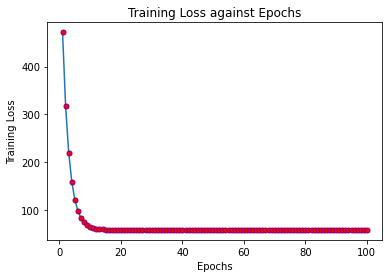

In [60]:
x = np.linspace(1, epochs, epochs)
plt.title("Training Loss against Epochs")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.plot(x, hist_loss, marker=".", markerfacecolor="red", markeredgecolor="purple", markersize=10.0)
plt.show()

### Displaying Mean Squred Error and R-Squared Error

In [52]:
# Loss times 2 is because our loss is divided by 2
print("Mean Squared Error: " + str(loss * 2))

sst = sum((y_test - y_test.mean())**2)
r2Error = 1 - ((loss * 2)/sst)
print("R-Squared Error: " + str(r2Error))

Mean Squared Error: 110.35583864877026
R-Squared Error: 0.9996661262100298
